In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import SQLContext
from pyspark.sql.types import StructField, StructType, StringType, DoubleType, IntegerType, DataType
from pyspark.sql.group import GroupedData
from pyspark.sql.functions import *

In [3]:
%matplotlib inline
plt.style.use('ggplot')

### Dataset and New York city taxi kaggle competition

https://www.kaggle.com/c/nyc-taxi-trip-duration

### Initialize SparkContext and SqlContexta

In [4]:
sc = pyspark.SparkContext(appName="NewYork-kaggle")
sc.appName = "NewYorkTaxi"
sc.master = "local[4]"
sqlContext = SQLContext(sc)

In [5]:
sc

<SparkContext master=local[4] appName=NewYorkTaxi>

### Define dataframe schema

In [6]:
newYorkSchema = StructType([
        StructField("id", StringType(), True),
        StructField("vendor_id", IntegerType(), False),
        StructField("pickup_datetime", StringType(), True),
        StructField("dropoff_datetime", StringType(), True),
        StructField("passenger_count", IntegerType(), True),
        StructField("pickup_longitude", DoubleType(), True),
        StructField("pickup_latitude", DoubleType(), True),
        StructField("dropoff_longitude", DoubleType(), True),
        StructField("dropoff_latitude", DoubleType(), True),
        StructField("store_and_fwd_flag", StringType(), True),
        StructField("trip_duration", IntegerType(), True)
    ])

### Create first dataframe from a CSV datasource

In [20]:
newYorkDF = sqlContext.read.option("header", "true").schema(newYorkSchema).csv("/Users/tudorl/Documents/workspaces/test/zeppelins/workshops/itdays2017/data/newyork/training/train.csv")

### Register dataframe as a table

In [21]:
newYorkDF.registerTempTable("newYorkTable")

In [22]:
newYorkDF.printSchema()

root
 |-- id: string (nullable = true)
 |-- vendor_id: integer (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- trip_duration: integer (nullable = true)



### Get total number of taxi trips from our dataset
#### DataFrame DSL

In [37]:
newYorkData.count()

1458644

#### Spark sql

In [38]:
sqlContext.sql("select count(*) from newYorkTable").show()

+--------+
|count(1)|
+--------+
| 1458644|
+--------+



### Get  number of taxi trips grouped by number of passengers

In [39]:
newYorkData.groupby(col("passenger_count")).count().show()

+---------------+-------+
|passenger_count|  count|
+---------------+-------+
|              1|1033540|
|              6|  48333|
|              3|  59896|
|              5|  78088|
|              9|      1|
|              4|  28404|
|              8|      1|
|              7|      3|
|              2| 210318|
|              0|     60|
+---------------+-------+



In [40]:
sqlContext.sql("select passenger_count, count(*) as count from newYorkTable group by passenger_count").show()

+---------------+-------+
|passenger_count|  count|
+---------------+-------+
|              1|1033540|
|              6|  48333|
|              3|  59896|
|              5|  78088|
|              9|      1|
|              4|  28404|
|              8|      1|
|              7|      3|
|              2| 210318|
|              0|     60|
+---------------+-------+



### Sort the above results

In [36]:
newYorkData.groupby(col("passenger_count")).count().orderBy(col("count").desc()).show()

+---------------+-------+
|passenger_count|  count|
+---------------+-------+
|              1|1033540|
|              2| 210318|
|              5|  78088|
|              3|  59896|
|              6|  48333|
|              4|  28404|
|              0|     60|
|              7|      3|
|              9|      1|
|              8|      1|
+---------------+-------+



In [45]:
sqlContext.sql("SELECT passenger_count, count(*) as count from newYorkTable GROUP BY passenger_count ORDER BY count DESC").show()

+---------------+-------+
|passenger_count|  count|
+---------------+-------+
|              1|1033540|
|              2| 210318|
|              5|  78088|
|              3|  59896|
|              6|  48333|
|              4|  28404|
|              0|     60|
|              7|      3|
|              9|      1|
|              8|      1|
+---------------+-------+



### TODO : How many taxi providers exist ?

In [57]:
newYorkData.groupby(col("vendor_id")).count().show()

+---------+------+
|vendor_id| count|
+---------+------+
|        1|678342|
|        2|780302|
+---------+------+



In [59]:
newYorkData.groupby(col("store_and_fwd_flag")).count().show()

+------------------+-------+
|store_and_fwd_flag|  count|
+------------------+-------+
|                 Y|   8045|
|                 N|1450599|
+------------------+-------+



In [52]:
newYorkData.toPandas()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [360]:
def plotByColumn(columnName, bins=10):
    plt.figure(1);
    plt.subplot(131)
    plt.title(columnName + " histogram")
    plt.hist(newYorkPandas[[columnName]].values, bins=bins);

    plt.subplot(133)
    plt.title(columnName + " boxplot")
    plt.boxplot(newYorkPandas[[columnName]].values, 1);

    
def plotByValues(values, bins=10):
    plt.figure(figsize=(40,10))
    plt.figure(1);
    plt.subplot(231)
    plt.title("histogram")
    plt.hist(values, bins=bins);

    plt.subplot(234)
    plt.title("boxplot")
    plt.boxplot(values, 1);

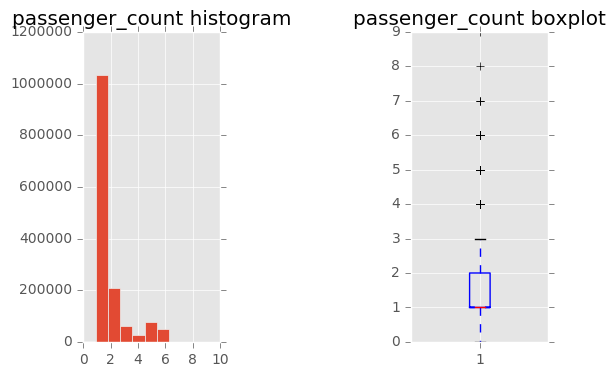

In [394]:
plotByColumn("passenger_count")

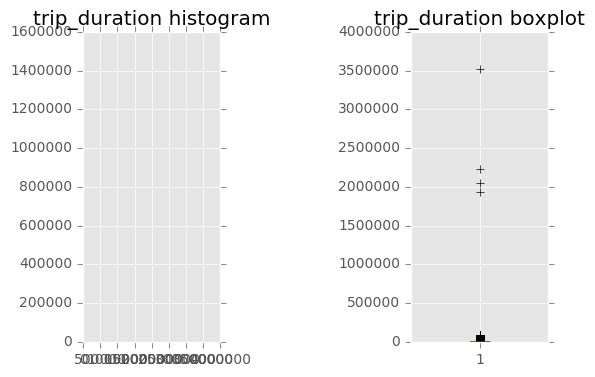

In [395]:
plotByColumn("trip_duration", bins=500)

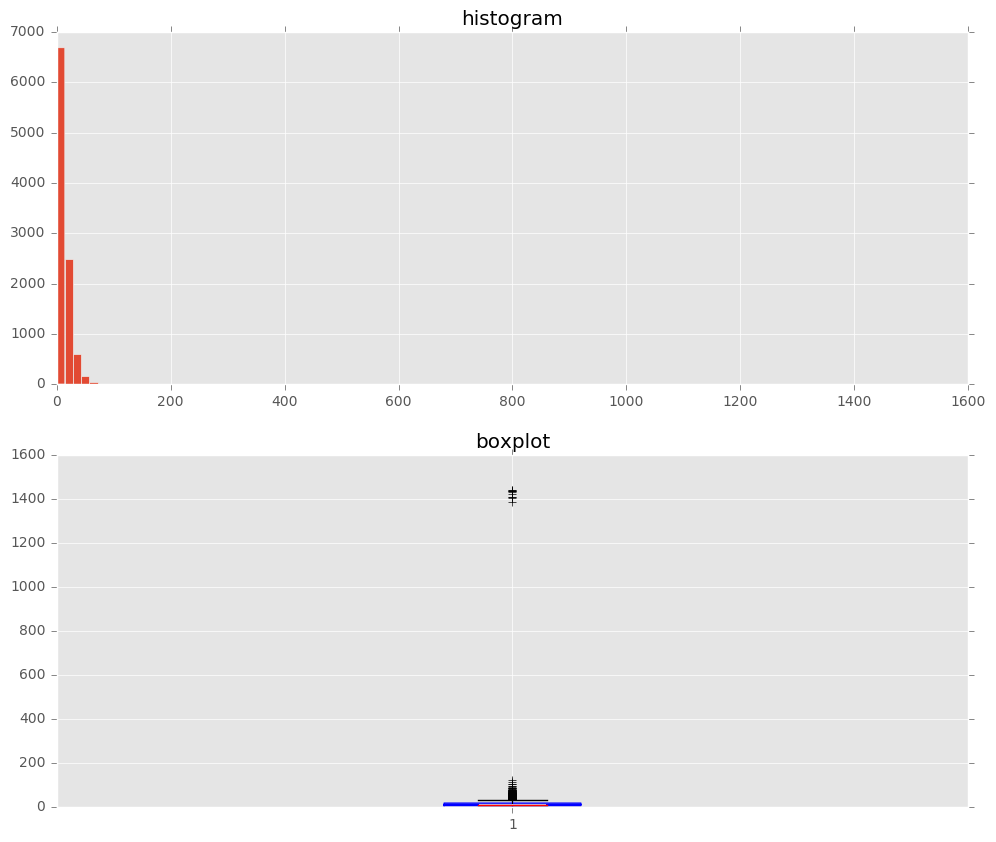

In [375]:
plotByValues(newYorkTraining.limit(10000).select((col("trip_duration") / 60).cast("int")).toPandas().values, bins=100)

In [376]:
minutes = newYorkTraining.groupby((col("trip_duration")/60).cast("int").alias("minutes")).count().orderBy(col("minutes").asc()).toPandas()

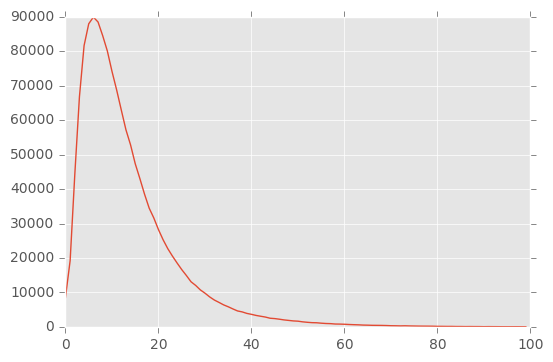

In [393]:
plt.plot(minutes[:100]["minutes"], minutes[:100]["count"])

In [328]:
newYorkTraining.limit(10).select((col("trip_duration") / 60).cast("int")).toPandas().values[:100]

array([[ 7],
       [11],
       [35],
       [ 7],
       [ 7],
       [ 7],
       [ 5],
       [25],
       [ 4],
       [20]])

In [247]:
newYorkPandas.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000


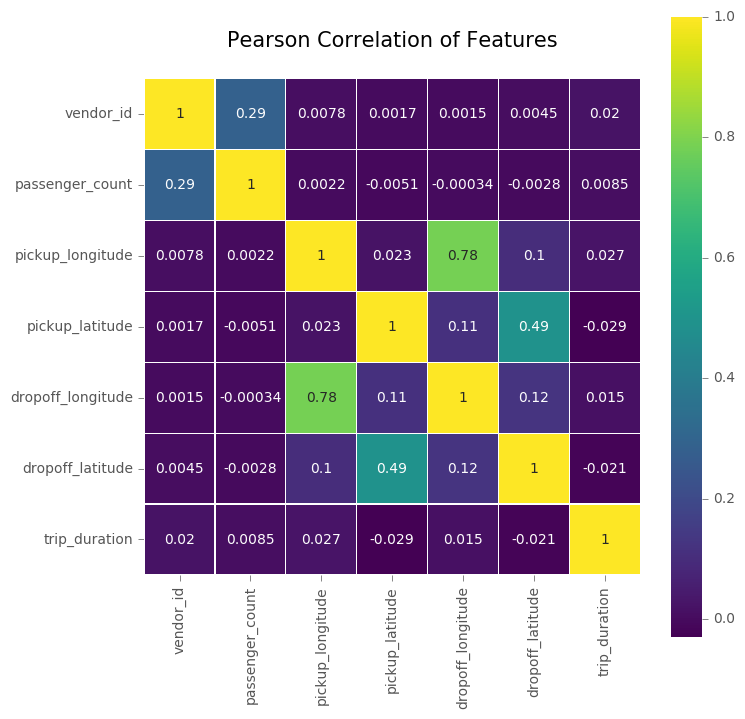

In [252]:
colormap = plt.cm.viridis
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(newYorkPandas.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [12]:
sc.stop()